# Table of Contents


<div class="lev2"><a href="#Introduction-to-Random-Signals">Introduction to Random Signals</a></div><div class="lev4"><a href="#Notations">Notations</a></div><div class="lev2"><a href="#Fundamental-properties">Fundamental properties</a></div><div class="lev3"><a href="#Stationnarity">Stationnarity</a></div><div class="lev3"><a href="#Ergodism">Ergodism</a></div><div class="lev4"><a href="#Definition">Definition</a></div><div class="lev3"><a href="#Examples-of-random-signals">Examples of random signals</a></div><div class="lev3"><a href="#White-noise">White noise</a></div><div class="lev2"><a href="#Second-order-analysis">Second order analysis</a></div><div class="lev3"><a href="#Correlation-functions">Correlation functions</a></div><div class="lev4"><a href="#Definition">Definition</a></div><div class="lev4"><a href="#Main-properties">Main properties</a></div><div class="lev4"><a href="#Exercises">Exercises</a></div><div class="lev4"><a href="#Estimation-of-correlation-functions">Estimation of correlation functions</a></div><div class="lev4"><a href="#Detecting-hidden-periodicities">Detecting hidden periodicities</a></div>

In [1]:
%run nbinit.ipy

... Configuring matplotlib formats
... Configuring matplotlib with inline figures
... Importing numpy as np, scipy as sp, pyplot as plt, scipy.stats as stats
   ... scipy.signal as sig
... Importing widgets, display, HTML, Image, Javascript
... Some LaTeX definitions


... Defining figures captions 


... Loading customized Javascript for interactive solutions (show/hide)
... Redefining interactive from ipywidgets


In [2]:
#Some specific imports for plotting

from plot_rea import *
from plot_sighisto import *
%matplotlib inline

## Introduction to Random Signals

Just as a random variable is a set of values associated with a probability distribution, a random signal, also callled a random process, is a set of *functions* associated with a probability distribution. In addition to properties similar to those of random variables, the study of random processes include characterizations of dependences *in* the random process (namely notions of *correlation*), the study the behaviour of the function under transformations (*filtering*) and the design of some optimal transformations.

#### Notations
We denote by $X(n,\omega)$ a random signal $X$. It is a set of functions of $n$, the set being indexed by  $\omega$. A random signal is thus a bivariate quantity. When  $\omega=\omega_i$ is fixed, we get a *realization* of the random process, denoted
$X(n,\omega_i)$ or, more simply $x_i(n)$.
When $n$ is fixed, the random process reduces to a simple random variable. Considering the process for $n=n_i$, 
we obtain a random variable $X(n_i,\omega)$, denoted
$X_i(\omega)$, or $X_i$. Finally, we will denote $x_i$ the values taken by the random variable
$X_i$.

## Fundamental properties

### Stationnarity

\begin{definition}
A random signal is said stationnary if its statistical properties are invariant by time translation. 
\end{definition}

This means that the joint probability density function
$$
p_{X(n_1), X(n_2), \ldots, X(n_k)} = p_{ X(n_1-\tau), X(n_2-\tau),
\ldots, X(n_k-\tau)},
$$
and if $\tau=n_k$
$$
p_{X(n_1), X(n_2), \ldots, X(n_k)} = p_{ X(n_1-n_k), X(n_2-n_k), 
\ldots, X(0)}.
$$
Therefore, the joint distribution only depends on $k-1$ parameters, instead
of the  $k$ initial parameters.

As a consequence, we have that

- $\E{X(n)}=\mu$  is constant and does not depend on the particular time $n$
- $\E{X(n)X(n-\tau)^*}=R_X(\tau)$  only depends on the delay between the two instants. In such a case, the resulting function $R_X(\tau)$ is called a **correlation function**.

$\def\ta#1{\left<#1\right>}$

### Ergodism

#### Definition

The time average, taken on realization $\omega$ is 
$$
\ta{X(n,\omega)^n} = \lim_{N \rightarrow +\infty} \frac{1}{N} \sum_{[N]} 
X(n,\omega)^n.
$$
Of course, in the general case, this time average **is** a random varaible, since it depends on $\omega$.

**Definition**
A random signal is said ergodic if its time averages are deterministic, i.e. non random, variables.

**Important consequence**

A really important consequence is that if a signal is both stationnary and ergodic, then the statistical means and the time averages are equal. 
$$
\boxed{\E\bullet=\ta\bullet}
$$

**Exercise**
> - Check that 

- (moments)
Check that if the signal is  both stationnary and ergodic, then
$$
\E{X(n,\omega)^n} = \lim_{N \rightarrow +\infty} \frac{1}{N} 
\sum_{[N]} X(n,\omega)^n,
$$

- (covariance) 
Similarly, check that
$$
R_X(\tau) = \E{X(n,\omega)X(t-\tau,\omega)} = \lim_{N \rightarrow +\infty} 
\frac{1}{N} \sum_{[N]} X(n,\omega)X(t-\tau,\omega).
$$

### Examples of random signals

>1.  Let us first consider the noisy sine wave $X(n,\omega) = A\sin(2\pi f_0 n)+B(n,\omega)$. Function `plot_rea` plots some realizations of this signal and plots the ensemble and time averages. You will also need `sig_histo` which plots the histogram, together with the time series.
>```
      from plot_rea import *
      from plot_sighisto import *
```
Experiment with the parameters (amplitude, number of samples). Is the signal stationary, ergodic, etc?

Standard deviation of time averages:  0.0749853946804


/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


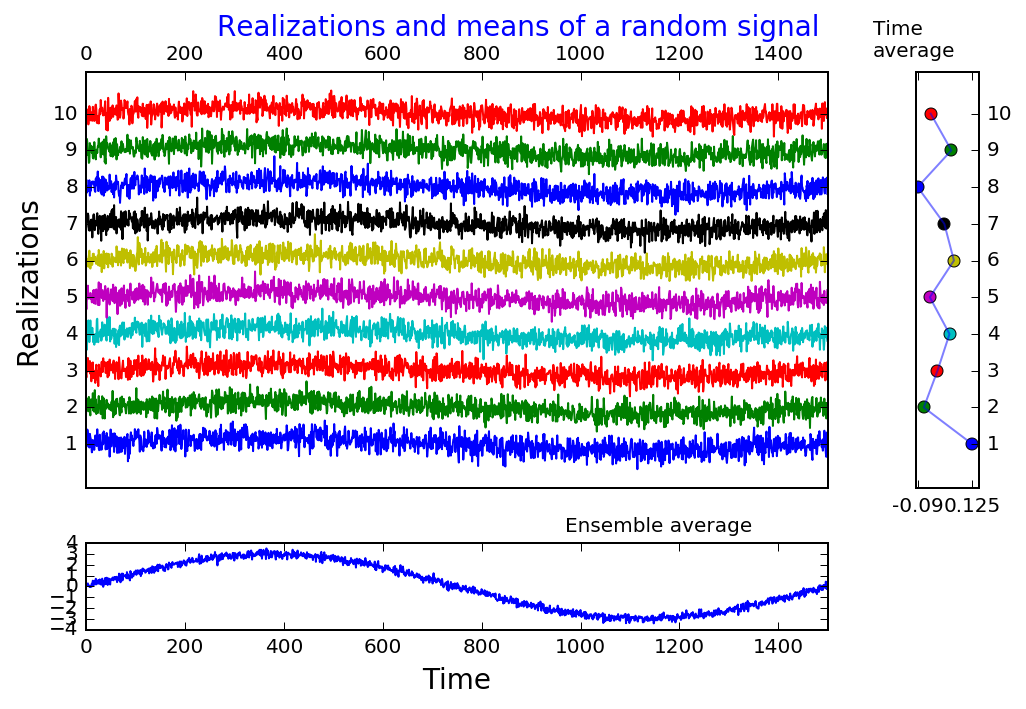

In [4]:
import scipy.stats as stats

M=10; # number of bins in histograms
N=1500 # Number of samples per realization
K=200 # Total number of realizations

XGauss=stats.norm(loc=0,scale=1) 

#Sine wave plus noise
X=3*XGauss.rvs(size=(K,N))+3*np.outer(np.ones((K,1)),np.sin(2*np.pi*np.arange(N)/N))
print("Standard deviation of time averages: ",np.std(np.mean(X,axis=1)))
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['figure.figsize'] = (8,5)
plot_rea(X,nb=10,fig=1)

By varying the number of samples $N$, we see that the time average converges to zero, for each realization. Thus we could say that this process is ergodic. However, the ensemble average converges to the sine wave and is dependent if time: the process *is not stationary*.

Standard deviation of time averages:  0.101358838417


/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


<function __main__.q1_experiment>

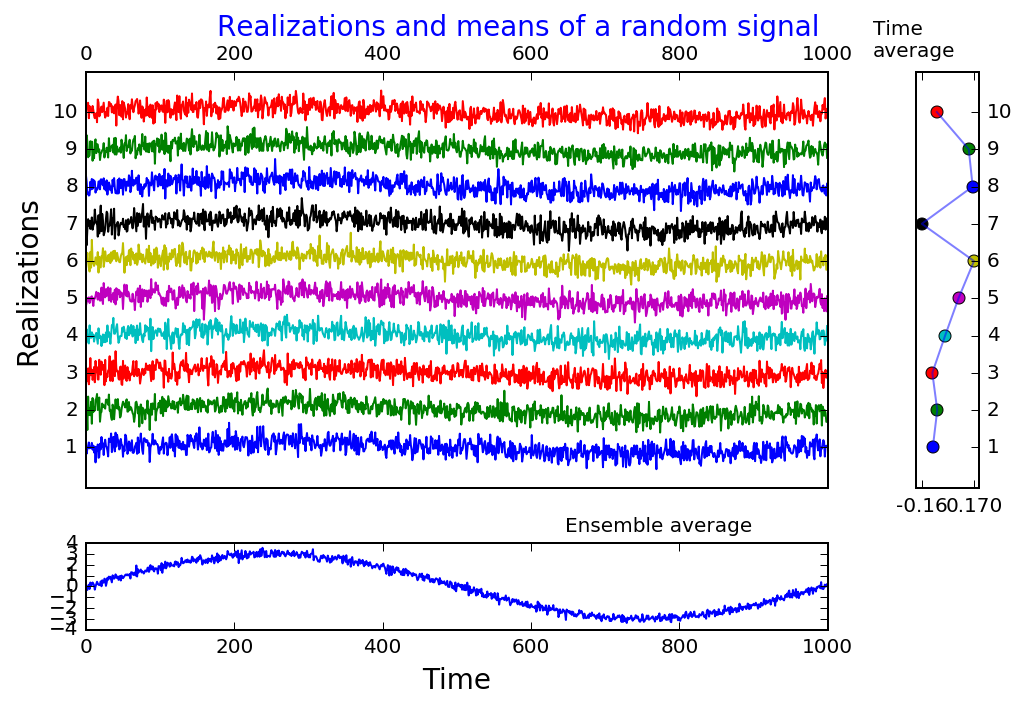

In [5]:
XGauss=stats.norm(loc=0,scale=1) 
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['figure.figsize'] = (8,5)

def q1_experiment(N):
    K=200
    #Sine wave plus noise
    X=3*XGauss.rvs(size=(K,N))+3*np.outer(np.ones((K,1)),np.sin(2*np.pi*np.arange(N)/N))
    print("Standard deviation of time averages: ",np.std(np.mean(X,axis=1)))
    plot_rea(X,nb=10,fig=1)
interact(q1_experiment, N=(0,2000,10))

>  2- Consider now a sine wave with a random phase $X(n,\omega) = A\sin(2 \pi f_0 n +\phi
(\omega))$. 

Experiment with the parameters (amplitude, number of samples). Is the signal stationary, ergodic, etc? Also change the value of the frequency, and replace function `sin` by `square` which generates a pulse train instead of a sine wave.

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


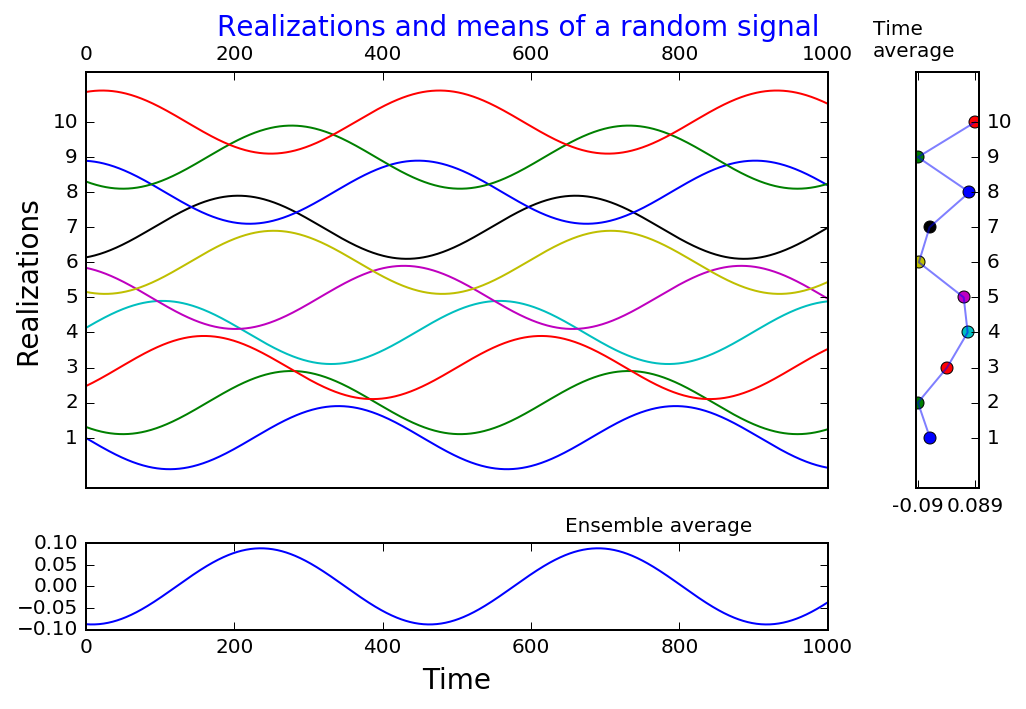

In [6]:
from pylab import *
K=100
N=1000
fo=2.2/N
S=zeros((K,N))
for r in range(K):
    S[r,:]=1.1*sin(2*pi*fo*arange(N) + 2*pi*rand(1,1));
plot_rea(S,fig=2)

This example shows that a random signal is not necessarily noisy and irregular. Here we have a random signal which is `smooth'. The random character is introduced by the random phase, which simply reflects that we do not know the time origin of this sine wave. 

Here, we see that both the time average and the ensemble average converge to zero. Therefore, we can conclude that this signal is stationary and ergodic.

Let us now define a square wave:

In [7]:
def square(x):
    """square(x): \n
    Returns a pulse train with period :math:`2\pi`
    """
    return sign(sin(x))   

Then generate a random square wave as follows

/usr/local/lib/python3.5/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


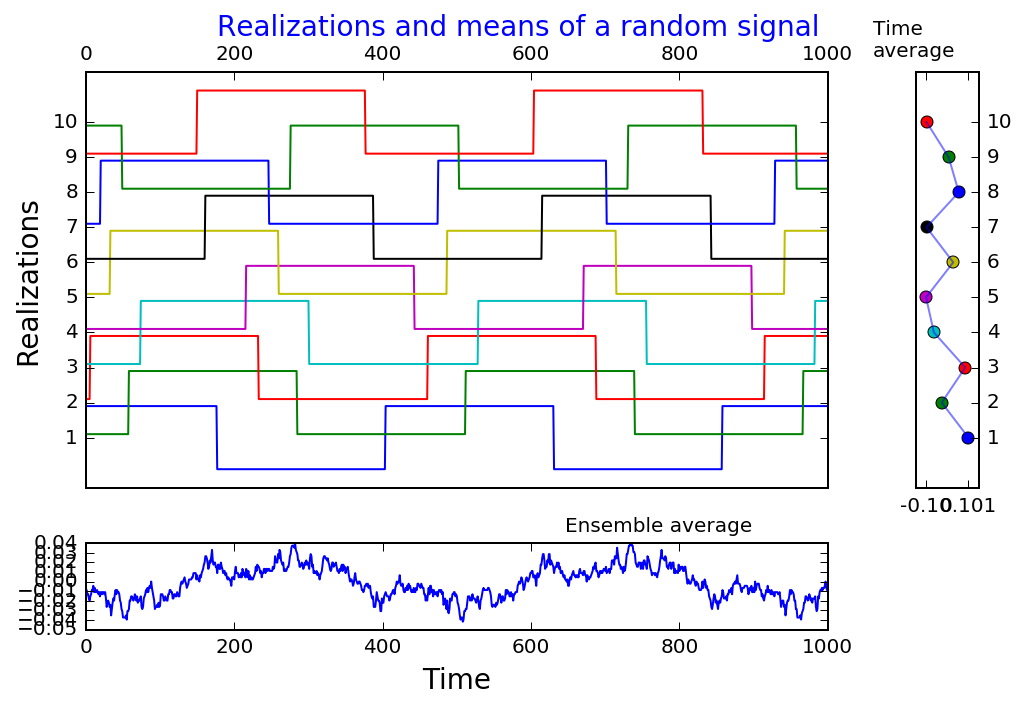

In [8]:
K=1000
N=1000
S=zeros((K,N))
for r in range(K):
    S[r,:]=1.1*square(2*pi*fo*arange(N) + 2*pi*rand(1,1));
plot_rea(S,fig=2)

Again, we see that both means tend to zero, a constant, which means that the signal is stationary (its ensemble average does not depend of time) and ergodic (its time average does not depend on the actual realization). 

### White noise

For discrete signals, a white noise is simply a sequence of independent variables (often the variables will be also identically distributed). An independent and identically distributed signal is denoted iid. 
Since the components of a white noise are all independent, there will be no correlation between them. We will see later that the spectral representation of a white noise is *flat*, thus coining the name of white noise by analogy with the white light. 

The notion of white noise is more involved in the case of a time-continuous signal. The white noise is in such case a limit processe with "microscopic dependences". 


We consider now two kinds of random noises: the first one is a sequence of independent and identically distributed variables (iid variables), according to a uniform distribution. The second one is an iid sequence, Gaussian distributed. Plot the two probability density functions, plot the histograms (with `sig_histo`) and compare the time series.

>3- Compute and analyze the histograms of two white noises, respectively with a uniform and a Gaussian probability density function, using the lines in script `q1c`. Do this for several realizations (launch the program again and again) and change the number of points and of bins. Compare the two signals. What do you think of the relation between whiteness and gaussianity. 

(0, 0.43883650844157601)

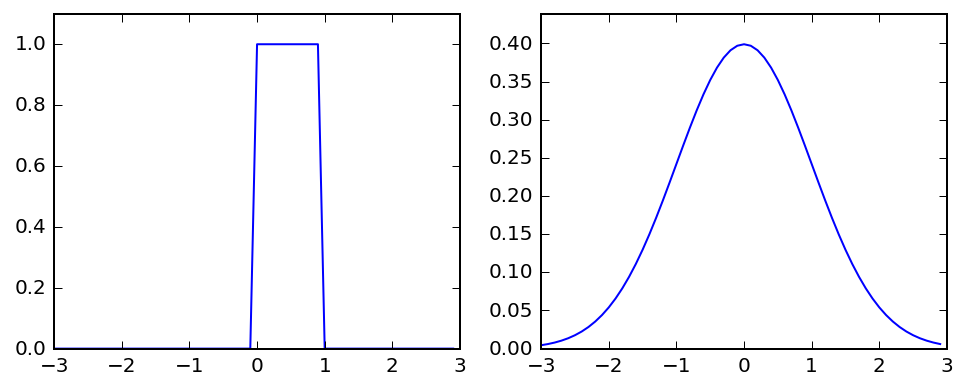

In [9]:
# An object "uniform random variable" with fixed bounds [0,1]
x_uni=stats.uniform(loc=0,scale=1)
# An object "gaussian random variable" with zero mean and scale 1
x_gauss=stats.norm(loc=0,scale=1)
#plt.rcParams['figure.figsize'] = (8,5)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
x=arange(-3,3,0.1)
ax1.plot(x,x_uni.pdf(x)); ax1.set_ylim([0, 1.1*max(x_uni.pdf(x))])
ax2.plot(x,x_gauss.pdf(x)); ax2.set_ylim([0, 1.1*max(x_gauss.pdf(x))])

In [ ]:
(m,v)=x_uni.stats(moments='mv')
print("Uniform distribution: ","Value of the mean : {0:2.3f} and of the variance {1:2.3f}".format(float(m),float(v)))
(m,v)=x_gauss.stats(moments='mv')
print("Gauss distribution: ","Value of the mean : {0:2.3f} and of the variance {1:2.3f}".format(float(m),float(v)))

We can compare the two signals

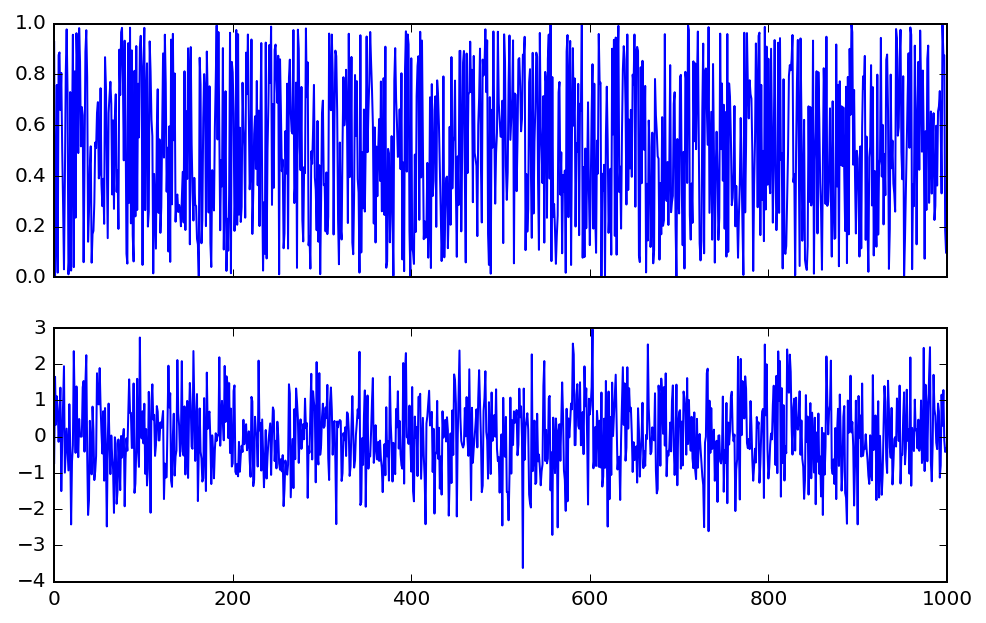

In [10]:
fig, (ax1,ax2)=subplots(2,1,sharex=True)
ax1.plot(x_uni.rvs(size=N))
ax2.plot(x_gauss.rvs(size=N))

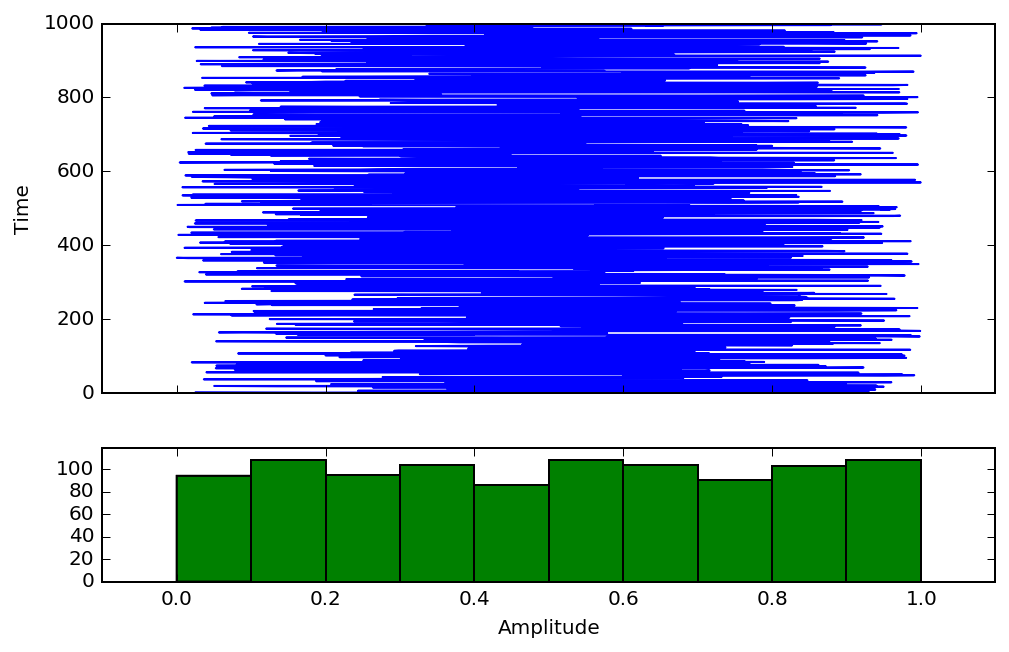

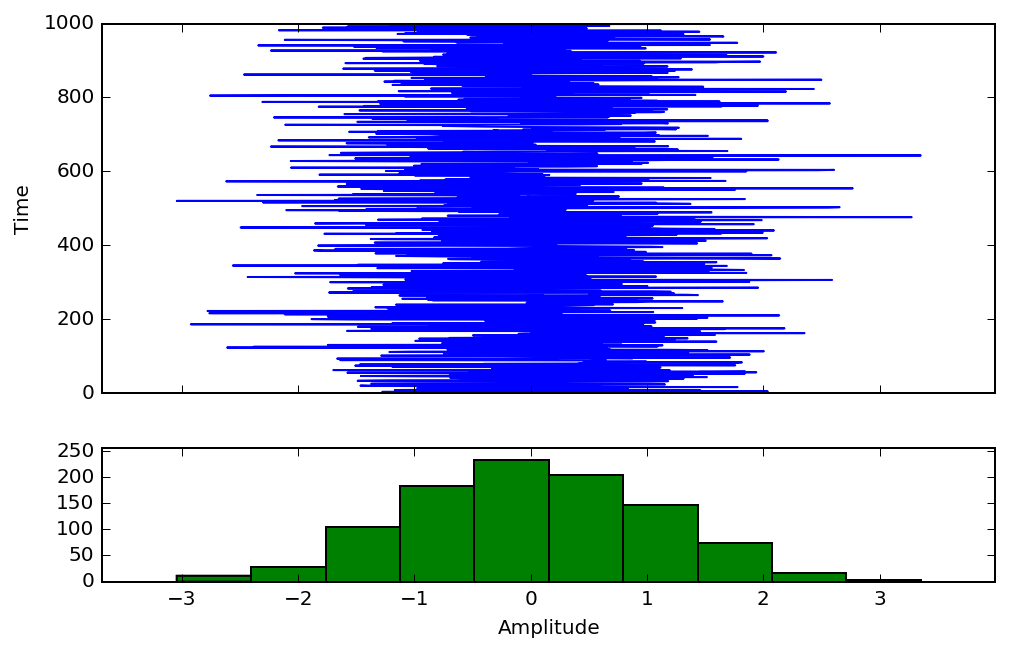

In [11]:
from plot_sighisto import *
plot_sighisto(x_uni.rvs(size=N),fig=1)
plot_sighisto(x_gauss.rvs(size=N),fig=2)

We see that the Gaussian noise is more concentrated on its mean 0, and exhibits more important values, while the uniform noise is confined into the interval [0,1]. 

Concerning the question on the relation between whiteness and Gaussianity, actually, there is no relation between these two concepts. A white noise can be distributed according to any distribution, and a Gaussian sequence is not necessarily iid (white). 

## Second order analysis

### Correlation functions

#### Definition

If $X(n,\omega)$ and $Y(n,\omega)$ sare two jointly stationnary random processes, the intercorrelation and autocorrelation functions are defined by
$$
\begin{array}{l}
\displaystyle{R_{XY}(k) \egalpardef \E{X(n,\omega)Y^*(n-k,\omega)} \egalparerg 
\lim_{N \rightarrow +\infty}\frac{1}{N} \sum_{n=0}^N X(n,\omega)Y^*(n-k,\omega), }
\\ 
\displaystyle{R_{XX}(k) \egalpardef \E{X(n,\omega)X^*(n-k,\omega)} \egalparerg 
\lim_{N \rightarrow +\infty}\frac{1}{N} \sum_{n=0}^N X(n,\omega)X^*(n-k,\omega)}.
\end{array}
$$

#### Main properties

\begin{enumerate}
\item (Hermitian symmetry)
$$
R_{YX}(\tau)=\E{Y(n,\omega)X^\star(n-\tau,\omega)} = \E{Y(n+\tau,\omega)X^\star(n,\omega)}= \E{X(n,\omega)Y^\star(n+\tau,\omega)}^\star = R_{XY}^\star(-\tau).
$$

\item (Symmetry for the autocorrelation). In the case of the autocorrelation function, the hermitian symmetry reduces to
$$
R_{XX}(\tau)= R_{XX}^\star(-\tau).
$$
\item (Centering). If 
$X_c(n,\omega)=X(n,\omega) - m_X$ is the centered signal, then 
$$
R_{XX}(\tau) = R_{X_cX_c}(\tau)+m_X^2.
$$
\item (Autocorrelation and power).  For a delay $\tau=0$, we have
$$
R_{XX}(0) = \E{|X(n,\omega)|^2} \egalparerg \lim_{N \rightarrow 
+\infty}\frac{1}{N} \sum_{[N]} |X(n,\omega)|^2  = P_X.
$$
This shows that $R_{XX}(0)$ is nothing but the power of the signal under study. Observe that necessarily $R_{XX}(0)>0$.

\item (Maximum). Beginning with the _Schwarz inequality_, 
$$
|<x,y>|^2 \leq <x,x> <y,y>,
$$
and using the scalar product $<x_1,x_2> = \E{X_1(n)X_2^*(n)}$, we get

\begin{itemize}
\item  $|R_{YX}(\tau)|^2 \leq R_{XX}(0)R_{YY}(0), ~~~~ \forall  \tau,$
\item  $|R_{XX}(\tau)| \leq R_{XX}(0), ~~~~ \forall  \tau, $
\end{itemize}

\item (Non negativity) The autocorrelation function is non negative definite
$$
\sum_i \sum_j \lambda_i R_{XX}(\tau_i - \tau_j) \lambda_j \geq 0,  ~~~
\forall i,j. 
$$
proof: develop  $\E{|\sum_i \lambda_i X(\tau_i)|^2}\geq0$

\item (Correlation coefficient). By the maximum property, the correlation coefficient
$$
\rho_{XY}(\tau)=\frac{R_{YX}(\tau)}{\sqrt{R_{XX}(0)R_{YY}(0)}}
$$
is such that $\rho_{XY}(\tau) \leq 1$.
\item (Memory). If the correlation coefficient is zero after a certain time
 $t_c$ then the process is said to have a finite memory and $t_c$ is called the *correlation time*. 
\end{enumerate} 

#### Exercises

\begin{enumerate}
\item Developing $\E{|X+ \lambda Y|^2}$ into a polynom of $\lambda$ and observing that this polynom in always nonegative, prove the Schwarz inequality. 

\item Consider a random signal $U(n,\omega)$ defined on the interval
$[0,N]$. Define the periodic signal 
$$
X(n,\omega)=\mathrm{Rep}_N[U(n,\omega)] =\sum_k U(t-kN,\omega).
$$
\begin{itemize}
 \item Show that $R_{UU}(\tau)=0$ for $\tau \notin [-N,N]$.
 \item Show that  $R_{XX}(\tau)$ is a periodic function with period $N$ and express  $R_{XX}(\tau)$ as a function of $R_{UU}(\tau)$. 
\end{itemize}

\item Consider a random signal $X(n,\omega)$ with autocorrelation  $R_{XX}(k)$ and define
$$
Z(n,\omega) = X(n,\omega) + a X(n-n_0,\omega).
$$
Compute the autocorrelation function of $Z(n,\omega)$.
\end{enumerate}

#### Estimation of correlation functions

  By stationnarity and ergodism, we have that
  $$
  \displaystyle{R_{XX}(k)  \egalparerg 
\lim_{N \rightarrow +\infty}\frac{1}{N} \sum_{n=0}^N X(n,\omega)X^*(n-k,\omega)}.
  $$
Given a finite number of points $N$, with data known from $n=0..N-1$, it is thus possible to approximate the correlation function by a formula like
$$
\displaystyle{R_{XX}(k)  =
\frac{1}{N} \sum_{n=0}^{N-1} X(n,\omega)X^*(n-k,\omega)}.
$$
If we take $k\geq0$, we see that $X^*(n-k,\omega)$ is unavailable for $k>n$. Consquently, the sum must go from $n=k$ to $N-1$. At this point, people define two possible estimators. The first one is said "unbiased" while the second is "biased" (check this by computing the expectation $\E{\bullet}$ of the two estimators). 
\begin{align}
\hat{R}_{XX}^{(unbiased)}(k)   &=
\frac{1}{N-k} \sum_{n=k}^{N-1} X(n,\omega)X^*(n-k,\omega) \\
\hat{R}_{XX}^{(biased)}(k)  &=
\frac{1}{N} \sum_{n=k}^{N-1} X(n,\omega)X^*(n-k,\omega).
\end{align}

For the biased estimator, it can be shown (Bartlett) that the variance has the form
$$
Var\left[\hat{R}_{XX}^{(biased)}(k)\right]  \approx \frac{1}{N} \sum_{m=-\infty}^{+\infty} \rho(m)^2 + \rho(m+k)\rho(m-k) -4\rho(m)\rho(k)\rho(m-k) + 2\rho(m)^2\rho(k)^2,
$$
that is, essentially a constant over $N$. As far the unbiased estimator is concerned, we will have a factor $N/(N-k)$, and we see that this time the variance *increases* with $k$. Thus, though it is unbiased, this estimator has a very bad behaviour with respect to the variance. 

This is checked below. First we generate a gaussian white noise, compute the two estimates of the correlation function and copare them. 

In [14]:
from correlation import xcorr
from scipy import stats as stats
N=100
XGauss=stats.norm(loc=0,scale=1) 
S=XGauss.rvs(size=N)
#
Rbiased,lags=xcorr(S,norm='biased')
Runbiased,lags=xcorr(S,norm='unbiased')
Rtheo=zeros(size(Rbiased))
Rtheo[lags==0]=1

(-0.5, 1.2)

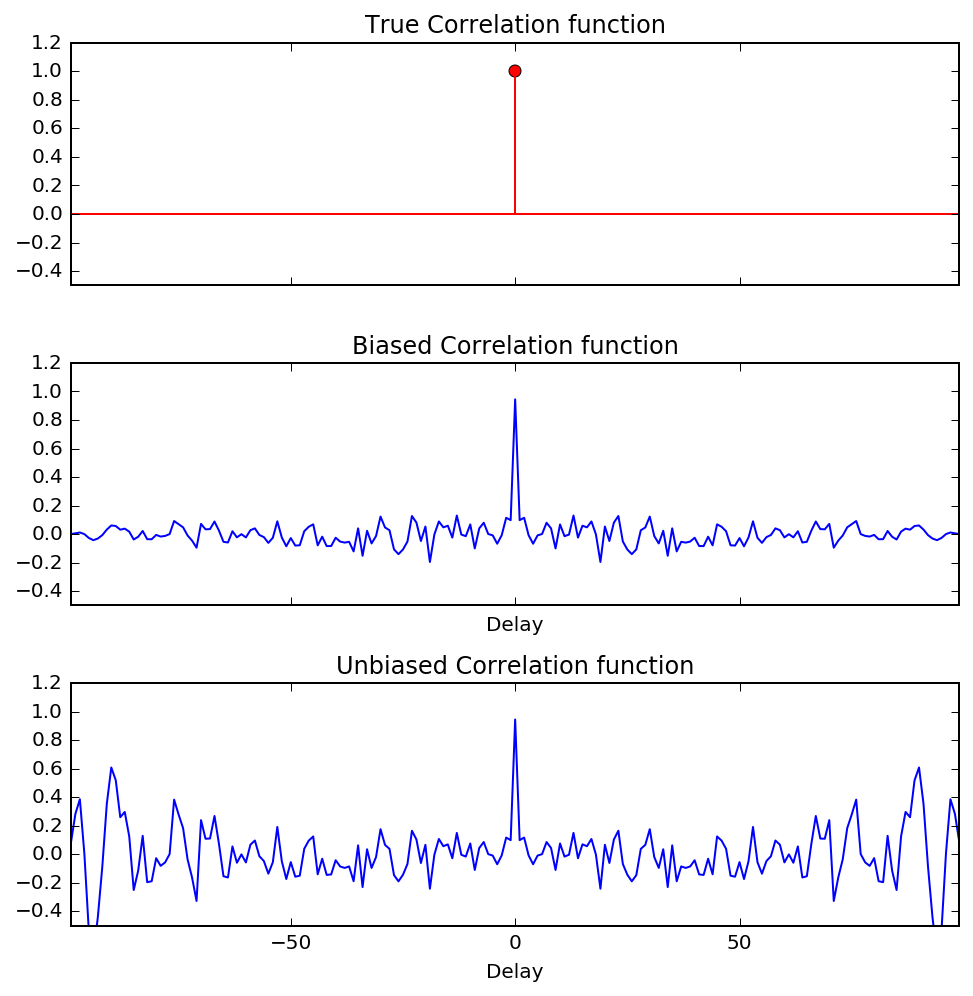

In [15]:
Rt=ones(1)
fig,ax=subplots(3,1,figsize=(7,7),sharex=True,sharey=True)
# biased correlation
ax[1].plot(lags,Rbiased)
#ax[0].axvline(0,ymin=0,ymax=1,color='r',lw=3)
ax[1].set_title("Biased Correlation function")
ax[1].set_xlabel("Delay")
ax[1].axis('tight')  #Tight layout of the axis
# unbiased correlation
ax[2].plot(lags,Runbiased)
ax[2].set_title("Unbiased Correlation function")
ax[2].set_xlabel("Delay")
# theoretical correlation
ax[0].stem([0],[1],linefmt='r-', markerfmt='ro', basefmt='r-')
ax[0].plot([lags[0],lags[-1]],[0, 0],'r')
ax[0].set_title("True Correlation function")
fig.tight_layout()
ax[1].axis('tight')
ax[0].set_ylim([-0.5,1.2])

#### Detecting hidden periodicities

We consider here a time series composed of a periodic signal corrupted by a white noise. 
The signal is completely hidden by the noise. We show here that it is possible to find some information in the autocorrelation function.

**Exercises** 
 - (a) Check that the correlation of a periodic signal is periodic 
 - (b) Give the correlation of $y=s+w$ if $s$ and $w$ are independent. 

In [19]:
def square(x):
    """square(x): \n
    Returns a pulse train with period :math:`2\pi`
    """
    return sign(sin(x))   

N=1000
f0=0.05
t=np.linspace(0,400,N)
x=sin(2*pi*f0*t)
noise=stats.norm(loc=0,scale=2).rvs(N)
observation=x+noise
#

Plot the correlation of the noisy signal. Are you able to retrieve the unknown periodicities? Experiment with the parameters. Conclusion.

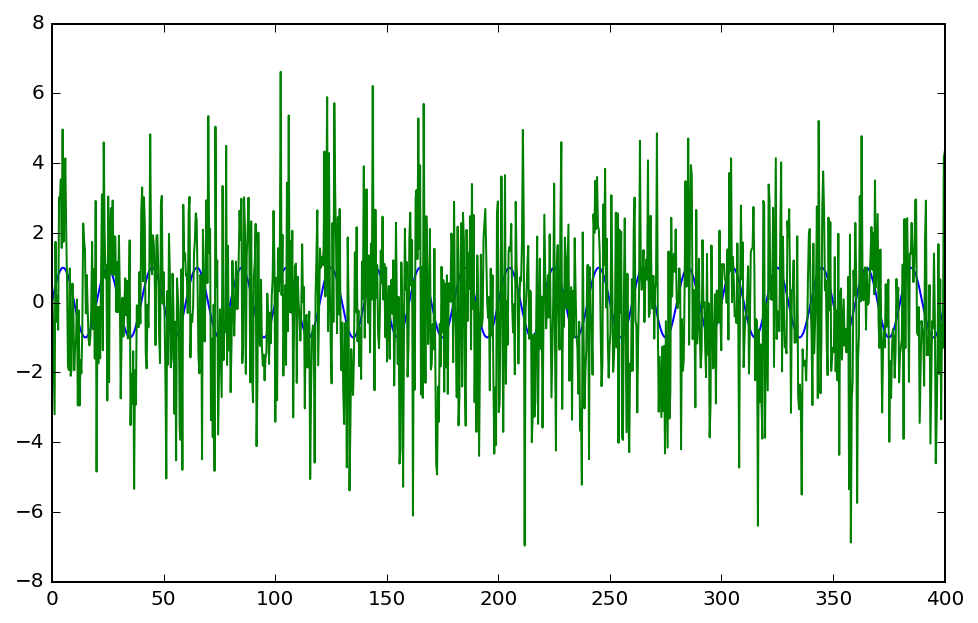

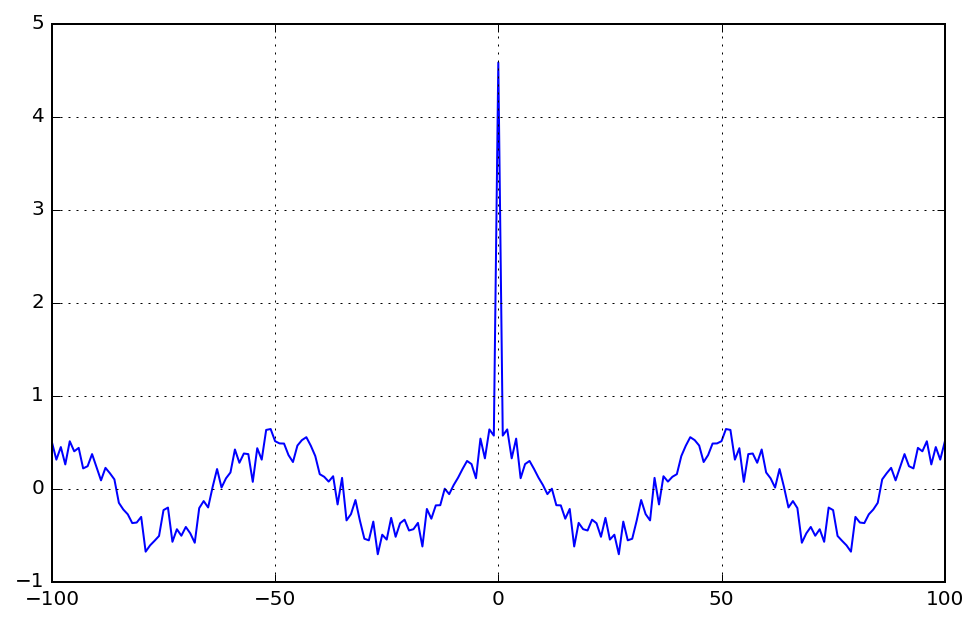

In [21]:
plt.plot(t,x,'-')
plt.plot(t,observation)
#
Rbiased,lags=xcorr(observation,norm='biased',maxlags=100)
plt.figure()
plt.plot(lags,Rbiased)
plt.grid(b='on')

The last figure shows the correlation of the noisy periodic signal. This correlation is simply the superposition of the correlation of the noise and of the correlation of the signal (Check it!)
$$
R_\text{obs,obs}=R_\text{sig,sig}+R_\text{noise,noise}
$$
Since the correlation of the noise (a Dirac impulse) is concentrated at zero, we can read
- the period of the signal: 50 (that is a relative frequency of 50/1000=0.05)
- the power of the signal: 1
- the power of the noise: 5 - 1 = 4 (was generated with a standard deviation of 2). 
The correlation function then enable us to grasp many informations that were not apparent in the time series!


----
<div align=right> <a href=toc.ipynb>Index</a> - <a href=BasicFiltering_correction.ipynb>Back</a> - <a href=Lecture2_RandomSignals.ipynb>Next</a></div>